# importar recursos

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import os
import re
import csv
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Definir la ruta del archivo en el escritorio
archivo_csv = os.path.join(os.path.expanduser("~"), "Escritorio", "datos_extraidos.csv")

# Bases de datos periodico las 2 orillas

In [2]:
# Lista de URLs de la base de datos LAS2ORILLAS
BASE_DATOS_las2orillas= [
"https://www.las2orillas.co/2023-y-el-proceso-de-paz-en-el-cauca/",
"https://www.las2orillas.co/la-paz-de-danilo-rueda-que-ya-no-sera-con-el/",
"https://www.las2orillas.co/a-la-paz-total-se-le-atraviesa-una-critica-mas-tecnica-que-politica/",
"https://www.las2orillas.co/educacion-de-la-juventud-y-dia-internacional-de-la-paz/",
"https://www.las2orillas.co/la-paz-ni-total-ni-a-medias/",
"https://www.las2orillas.co/sin-aceptar-al-otro-sera-imposible-la-paz/",
"https://www.las2orillas.co/la-marana-de-la-paz-total/",
"https://www.las2orillas.co/7-anos-del-acuerdo-de-paz-que-transformo-al-pais/",
"https://www.las2orillas.co/asi-se-construye-la-paz/",
"https://www.las2orillas.co/una-paz-a-mordiscos/",
"https://www.las2orillas.co/una-agenda-por-la-paz-en-la-guajira/",
"https://www.las2orillas.co/paz-total-reformas-y-elecciones-la-agenda-politica-para-el-2023/",
"https://www.las2orillas.co/inteligencia-y-universidades-el-refuerzo-necesario-por-la-paz-total/",
"https://www.las2orillas.co/que-implicaciones-tiene-conseguir-la-paz/",
"https://www.las2orillas.co/jovenes-en-paz-y-los-demas-que/",
"https://www.las2orillas.co/sin-politica-social-la-paz-total-sera-solo-de-papel/",
"https://www.las2orillas.co/por-primera-vez-la-paz-esta-en-manos-del-pueblo/",
"https://www.las2orillas.co/por-que-no-habra-paz-total-sin-lineas-rojas/",
"https://www.las2orillas.co/gobierno-eln-es-posible-que-fracase-la-paz-total/",
"https://www.las2orillas.co/que-no-nos-enganen-sin-participacion-ciudadana-no-habra-consecucion-de-la-paz/",
"https://www.las2orillas.co/a-pesar-de-la-ultraderecha-colombiana-hechos-demuestran-que-paz-total-sigue-en-firme/",
"https://www.las2orillas.co/comisionado-de-paz-no-nos-diga-mas-mentiras/",
'https://www.las2orillas.co/implementar-el-acuerdo-de-paz-demoraria-26-anos-contraloria/',
'https://www.las2orillas.co/paz-en-colombia-o-el-ocaso-de-un-nobel/',
'https://www.las2orillas.co/la-negacion-del-conflicto-acaba-con-la-paz-en-colombia/',
'https://www.las2orillas.co/sobre-la-implementacion-de-los-acuerdos-de-paz-en-colombia/',
'https://www.las2orillas.co/la-tristeza-de-pepe-mujica-con-el-proceso-de-paz-en-colombia/',
'https://www.las2orillas.co/masacres-estamos-perdiendo-lo-ganado-en-el-proceso-de-paz/',
'https://www.las2orillas.co/los-temibles-shotas-de-buenaventura-que-quieren-firmar-la-paz-total/',
'https://www.las2orillas.co/del-discurso-a-los-hechos-que-garantias-hay-para-asegurar-la-paz-total/',
'https://www.las2orillas.co/la-agenda-de-juventudes-paz-y-seguridad-una-oportunidad-para-america-latina/',
'https://www.las2orillas.co/el-cafe-como-apuesta-de-construccion-de-paz/',
'https://www.las2orillas.co/la-paz-en-un-dia-oscuro-y-lluvioso/',
'https://www.las2orillas.co/un-ano-defendiendo-la-paz/',
'https://www.las2orillas.co/paz-y-reconciliacion-la-ong-mas-influyente-del-pais/',
'https://www.las2orillas.co/la-importancia-de-fortalecer-el-proceso-de-paz-en-colombia/',
'https://www.las2orillas.co/santos-se-remanga-para-defender-el-acuerdo-de-paz-que-firmo/',
'https://www.las2orillas.co/la-paz-que-nunca-ha-existido-en-colombia/',
'https://www.las2orillas.co/como-va-la-implementacion-del-acuerdo-de-paz-en-materia-agraria/',
'https://www.las2orillas.co/un-ano-nefasto-para-el-proceso-de-paz-y-la-seguridad-del-pais/',
'https://www.las2orillas.co/cinco-anos-de-un-acuerdo-sin-paz-1270-lideres-asesinados/',
'https://www.las2orillas.co/una-mirada-al-ods-16-paz-justicia-e-instituciones-solidas/',
'https://www.las2orillas.co/utopia-la-apuesta-por-la-paz-de-la-universidad-de-la-salle/',
'https://www.las2orillas.co/no-me-arrepiento-ni-de-la-guerra-ni-de-la-paz/',
'https://www.las2orillas.co/que-salio-mal-en-la-negociacion-de-paz-que-termino-en-la-multiplicacion-de-las-disidencias/',
'https://www.las2orillas.co/la-paz-en-colombia-solo-puede-ser-decolonial/',
'https://www.las2orillas.co/el-terrorismo-en-la-frontera-ahi-tienen-su-paz/',
'https://www.las2orillas.co/sobre-la-paz/',
'https://www.las2orillas.co/celebramos-cinco-anos-de-paz-o-de-agudizada-guerra/',
'https://www.las2orillas.co/la-paz-total-y-el-desolador-escenario-de-la-violencia-en-colombia/',
'https://www.las2orillas.co/el-bofeton-que-petro-pretende-darle-al-plan-colombia-y-a-la-intervencion-de-estados-unidos/',
'https://www.las2orillas.co/la-paz-total-de-petro-sera-una-realidad-en-cuatro-anos/',
'https://www.las2orillas.co/encadenados-a-una-falsa-libertad/',
'https://www.las2orillas.co/lo-que-oculta-el-debate-por-la-libertad-de-prensa/',
'https://www.las2orillas.co/las-mentirillas-de-petro-contra-la-libertad-y-el-orden/',
'https://www.las2orillas.co/que-tiene-que-ver-la-prensa-en-la-democracia-y-la-libertad-en-colombia/',
'https://www.las2orillas.co/el-presidente-petro-y-la-libertad-de-prensa/',
'https://www.google.com/url?client=internal-element-cse&cx=partner-pub-5711534423631426:7235650997&q=https://www.las2orillas.co/libertad-para-el-papa-de-luis-diaz/&sa=U&ved=2ahUKEwiv7ey8wMeHAxXSSDABHbY2Ok8QFnoECAAQAg&usg=AOvVaw1DJ9xEUgyhxJQZezuATVE7',
'https://www.google.com/url?client=internal-element-cse&cx=partner-pub-5711534423631426:7235650997&q=https://www.las2orillas.co/la-libertad-de-prensa-en-los-tiempos-de-twitter/&sa=U&ved=2ahUKEwjvlf-2wseHAxW4TTABHYP-D8o4HhAWegQIABAC&usg=AOvVaw0Srsz8dASOZMTfCa3TApRj',
'https://www.google.com/url?client=internal-element-cse&cx=partner-pub-5711534423631426:7235650997&q=https://www.las2orillas.co/serie-33-lecciones-para-construir-la-paz-capitulo-12-la-libertad/&sa=U&ved=2ahUKEwjvlf-2wseHAxW4TTABHYP-D8o4HhAWegQIBBAC&usg=AOvVaw1CKcAGRsjOXyukPJXv22NW',
'https://www.google.com/url?client=internal-element-cse&cx=partner-pub-5711534423631426:7235650997&q=https://www.las2orillas.co/libertad-de-prensa-periodismo-vulnerado/&sa=U&ved=2ahUKEwj4mO6zw8eHAxWcMlkFHceSKi84KBAWegQIBBAC&usg=AOvVaw18vy4nY1Oe_yOi0X2a2fzG',
'https://www.las2orillas.co/2023-un-ano-crucial-en-defensa-de-la-libertad/',
'https://www.las2orillas.co/la-libertad-de-prensa-y-expresion-en-tiempos-de-gustavo-petro/',
'https://www.google.com/url?client=internal-element-cse&cx=partner-pub-5711534423631426:7235650997&q=https://www.las2orillas.co/en-libertad/&sa=U&ved=2ahUKEwi7s9SgxMeHAxXkF1kFHQ4sCus4PBAWegQIAxAC&usg=AOvVaw3_pinu06RW7pmc9gqlLjRX',
'https://www.google.com/url?client=internal-element-cse&cx=partner-pub-5711534423631426:7235650997&q=https://www.las2orillas.co/y-al-final-sucede-la-libertad-rota-del-siglo-xxi/&sa=U&ved=2ahUKEwjum8_kxMeHAxWUMlkFHX93M344WhAWegQIBRAC&usg=AOvVaw04oh5ZE-HlevR2zAmpoxVU',
'https://www.las2orillas.co/los-caminos-del-miedo/',
'https://www.las2orillas.co/la-libertad-de-prensa-en-colombia-de-muerte-lenta/',
'https://www.las2orillas.co/la-libertad-de-expresion-y-el-periodismo-en-colombia/',
'https://www.las2orillas.co/el-principal-enemigo-de-la-libertad/',
'https://www.google.com/url?client=internal-element-cse&cx=partner-pub-5711534423631426:7235650997&q=https://www.las2orillas.co/libertad-de-catedra/&sa=U&ved=2ahUKEwiv7ey8wMeHAxXSSDABHbY2Ok8QFnoECAkQAg&usg=AOvVaw05VXVi-90WZ_c0JDaZbY-t',
'https://www.las2orillas.co/la-guerra/',
'https://www.google.com/url?client=internal-element-cse&cx=partner-pub-5711534423631426:7235650997&q=https://www.las2orillas.co/todo-maestro-debe-ensenar-para-la-autonomia-y-la-libertad/&sa=U&ved=2ahUKEwj4mO6zw8eHAxWcMlkFHceSKi84KBAWegQICBAC&usg=AOvVaw2vpJjJXKuDA5AtVwGpHU2k',
'https://www.las2orillas.co/esta-en-riesgo-nuestra-libertad/',
'https://www.las2orillas.co/se-debe-quitar-la-libertad-para-proteger-a-la-humanidad/',
'https://www.las2orillas.co/lo-democratico-la-democracia-y-la-oposicion/',
'https://www.las2orillas.co/que-es-la-democracia/',
'https://www.las2orillas.co/un-llamado-a-democracia-universitaria/',
'https://www.las2orillas.co/la-democracia-que-necesitamos/',
'https://www.las2orillas.co/votar-y-elegir-no-es-democracia/',
'https://www.las2orillas.co/la-importancia-de-ensenar-la-democracia-en-el-colegio/',
'https://www.las2orillas.co/que-tiene-que-ver-la-prensa-en-la-democracia-y-la-libertad-en-colombia/',
'https://www.google.com/url?client=internal-element-cse&cx=partner-pub-5711534423631426:7235650997&q=https://www.las2orillas.co/serie-33-lecciones-para-construir-la-paz-capitulo-20-el-otono-de-la-democracia/&sa=U&ved=2ahUKEwiWqZ30x8eHAxWdmYQIHf59CkQ4ChAWegQIBRAC&usg=AOvVaw2QnQfJbnk3SOMsNBUcaYv9',
'https://www.las2orillas.co/el-legado-de-los-medios-hegemonicos-en-colombia-terrorismo-mediatico-y-asesinato-de-la-democracia/',
'https://www.las2orillas.co/la-democracia-una-entelequia-del-estado-moderno/',
'https://www.las2orillas.co/existe-democracia-en-colombia-centro-esperanza-j-m-galan-y-robledo-se-marean-al-responder/',
'https://www.las2orillas.co/ecos-de-la-voz-de-uribe-a-100-dias-del-gobierno-petro/',
'https://www.las2orillas.co/colombia-se-raja-en-los-indices-de-democracia-si-se-compara-con-otros/',
'https://www.las2orillas.co/defender-los-servicios-publicos-es-defender-la-democracia/',
'https://www.las2orillas.co/la-democracia-contra-si-misma/',
'https://www.las2orillas.co/el-futuro-de-la-democracia/',
'https://www.las2orillas.co/democracia-en-colombia/',
'https://www.las2orillas.co/para-gobernar-este-ingobernable-pais-el-pacto-historico-se-abre-a-otras-democracias/',
'https://www.las2orillas.co/polarizacion-sin-control/',
'https://www.las2orillas.co/prensa-democracia-y-libertad/',
'https://www.las2orillas.co/del-m-19-la-democracia-y-la-literatura/',
'https://www.las2orillas.co/justicia-transicional-apuesta-por-la-paz-total-2/',
'https://www.las2orillas.co/ministerio-de-la-igualdad-la-equidad-y-la-justicia-climatica/',
'https://www.las2orillas.co/observaciones-del-proyecto-de-reforma-a-la-justicia-2023/',
'https://www.las2orillas.co/sobre-verdad-justicia-reparacion-en-un-pais-sin-memoria/',
'https://www.las2orillas.co/justicia-artificial/',
'https://www.las2orillas.co/resultados-y-limitaciones-de-la-jep/',
'https://www.las2orillas.co/la-joven-magistrada-de-la-jep-que-tiene-acorralado-al-general-mario-montoya/',
'https://www.las2orillas.co/de-que-depende-el-gran-acuerdo-nacional/',
'https://www.las2orillas.co/justicia-climatica-de-bogota-a-barranquilla/',
'https://www.las2orillas.co/la-justicia-climatica-en-el-proximo-gobierno-de-colombia/',
'https://www.las2orillas.co/la-era-del-vivir-sabroso-y-con-dignidad-en-el-gobierno-petro-marquez/',
'https://www.las2orillas.co/transicion-hacia-la-colombia-de-lo-posible/',
'https://www.las2orillas.co/se-materializara-la-justicia-social-o-los-propositos-personales/',
'https://www.las2orillas.co/los-nuevos-tres-huevitos/',
'https://www.las2orillas.co/la-esteril-e-ineficiente-justicia-digital/',
'https://www.las2orillas.co/una-campana-que-pide-justicia-en-colombia/',
'https://www.las2orillas.co/la-pandemia-no-trajo-la-justicia-digital/',
'https://www.las2orillas.co/la-justicia-transicional-en-colombia-y-las-victimas-de-la-megamineria/',
'https://www.las2orillas.co/sera-que-los-abogados-deben-dejar-el-monopolio-de-la-justicia/',
'https://www.las2orillas.co/al-pueblo-lo-que-es-del-cesar/',
]

# Definir la función para extraer el autor
def extraer_autor(soup):
    autor_div = soup.find("div", class_="meta-posted-by")
    if autor_div:
        strong_tag = autor_div.find("strong")
        if strong_tag:
            return strong_tag.text.strip()
        # Si no se encuentra el autor en <strong>, intentar extraer desde <a rel="author">
        autor_tag = autor_div.find("a", rel="author")
        if autor_tag:
            return autor_tag.text.strip()
    return "Autor no encontrado"

# Crear una lista para almacenar los datos extraídos
datos_extraidos = []

nombre_periodico = "Las 2 orillas"

# Iterar sobre cada URL de la base de datos
for URL_BASE in BASE_DATOS_las2orillas:
    pedido_obtenido = requests.get(URL_BASE)
    html_obtenido = pedido_obtenido.text
    soup = BeautifulSoup(html_obtenido, "html.parser")

    # Encontrar los elementos <div> con la clase "font--secondary"
    divs = soup.find_all('p')

    # Crear una lista para almacenar los textos del artículo
    texto_articulo = []
    for div in divs:
        texto_articulo.append(div.text.strip())

    # Unir todos los textos del artículo en una cadena
    articulo_completo = " ".join(texto_articulo)

    # Extraer autor
    autor = extraer_autor(soup)

    # Extraer fecha de publicación
    autor_div = soup.find("div", class_="meta-posted-by")
    fecha_meta = autor_div.find("meta", itemprop="datePublished") if autor_div else None
    fecha_span = autor_div.find("span", class_="meta-time") if autor_div else None
    fecha = fecha_meta["content"].strip() if fecha_meta else (fecha_span.text.strip() if fecha_span else "Fecha no encontrada")

    # Contar el número de palabras del artículo
    num_palabras = len(articulo_completo.split())

    # Agregar los datos extraídos a la lista
    datos_extraidos.append([autor, fecha, num_palabras, articulo_completo])

# Crear el DataFrame de pandas con las columnas originales
columnas = ["Autor", "Fecha de Publicación", "Número de Palabras", "Texto del Artículo"]
df = pd.DataFrame(datos_extraidos, columns=columnas)

# Añadir el nombre del periódico a cada entrada
df["Nombre del Periódico"] = nombre_periodico

# Eliminar la columna de texto del artículo
df = df.drop(columns=["Texto del Artículo"])

# Mostrar las tres primeras filas del DataFrame
print(df)

# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidoslas2orillas_descriptivo_COMPLETO.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Escribir la cabecera
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Escribir los datos
    for index, row in df.iterrows():
        escritor_csv.writerow(row)

                                 Autor Fecha de Publicación  \
0         Leandro Felipe Solarte Nates   diciembre 26, 2023   
1               Guillermo Segovia Mora    diciembre 6, 2023   
2    Fredy Alexánder Chaverra Colorado      febrero 7, 2023   
3                 David Auris Villegas      octubre 2, 2023   
4             Fabio Larrahondo Viáfara   noviembre 15, 2023   
..                                 ...                  ...   
110                       Jay Bernardy       julio 12, 2021   
111           Douglas Velasquez Jácome        junio 8, 2020   
112                      Horacio Duque       agosto 4, 2020   
113               Ana Restrepo Londoño       abril 15, 2020   
114                       Pablo Nariño   noviembre 24, 2020   

     Número de Palabras Nombre del Periódico  
0                   822        Las 2 orillas  
1                  1419        Las 2 orillas  
2                   737        Las 2 orillas  
3                   502        Las 2 orillas  
4       

# Analisis descriptivo

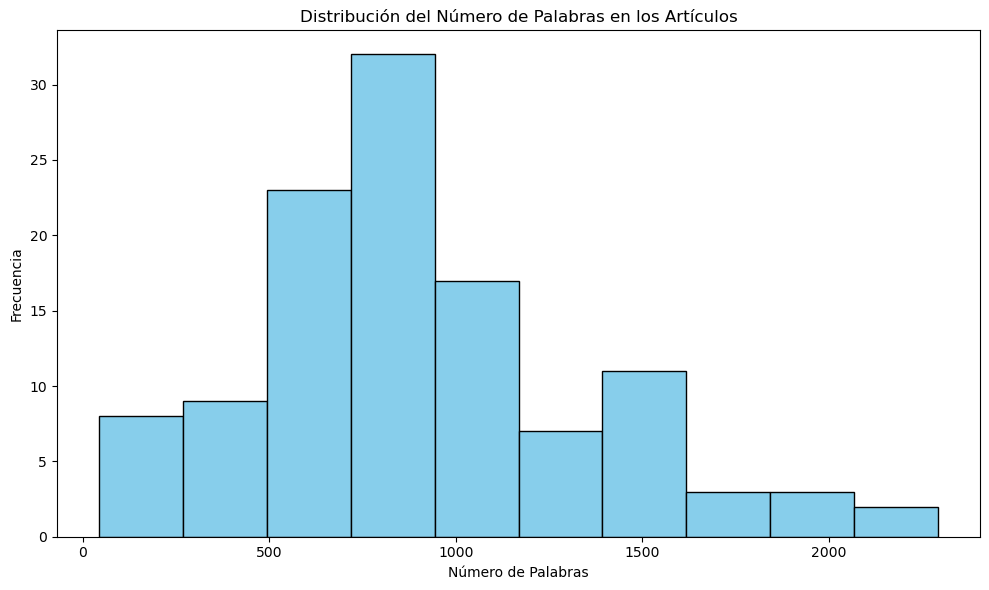

In [9]:
# Gráfica 1: Distribución del Número de Palabras
plt.figure(figsize=(10, 6))
plt.hist(df['Número de Palabras'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Palabras en los Artículos')
plt.tight_layout()
plt.show()

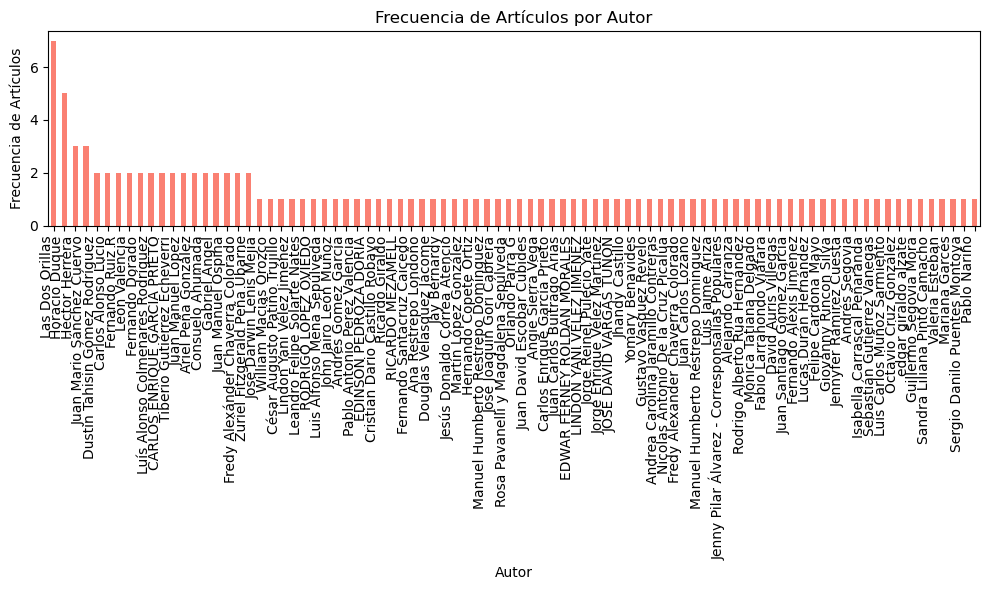

In [11]:
# Gráfica 2: Frecuencia de artículos por autor
plt.figure(figsize=(10, 6))
df['Autor'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Autor')
plt.ylabel('Frecuencia de Artículos')
plt.title('Frecuencia de Artículos por Autor')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [12]:
from datetime import datetime

# Diccionario de meses en español a inglés
meses = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March',
    'abril': 'April', 'mayo': 'May', 'junio': 'June',
    'julio': 'July', 'agosto': 'August', 'septiembre': 'September',
    'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

# Función para convertir la fecha
def convertir_fecha(fecha):
    # Reemplaza el mes en español con el mes en inglés
    for espanol, ingles in meses.items():
        if espanol in fecha:
            fecha = fecha.replace(espanol, ingles)
            break
    # Convertir a formato datetime
    try:
        return pd.to_datetime(fecha, format='%B %d, %Y')
    except ValueError as e:
        print(f"Error al convertir la fecha: {fecha} - {e}")
        return None

# Aplicar la conversión de fechas
df['Fecha de Publicación'] = df['Fecha de Publicación'].apply(convertir_fecha)


TypeError: argument of type 'Timestamp' is not iterable

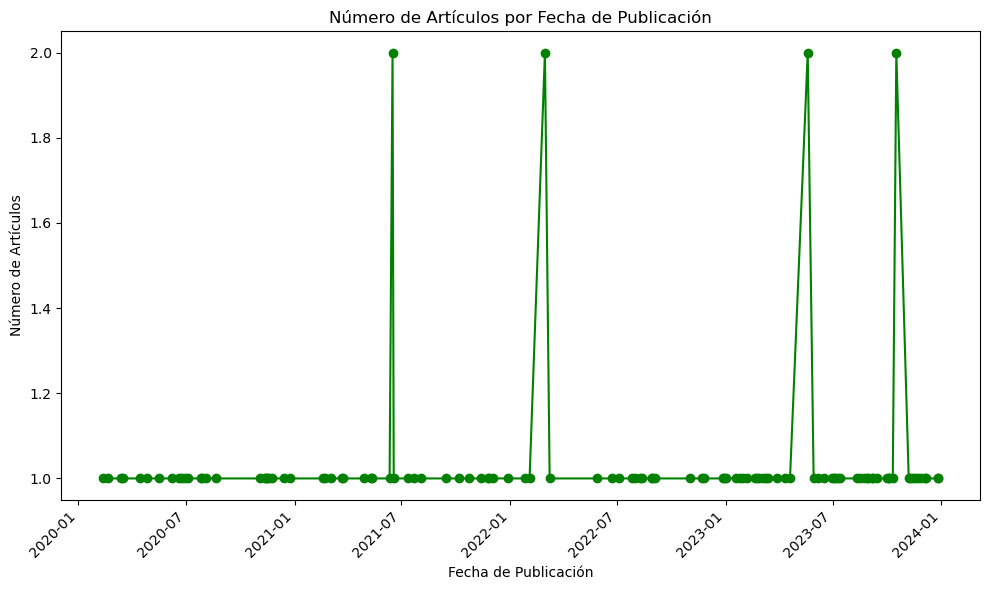

In [13]:
# Gráfica 3: Artículos por Fecha de Publicación
plt.figure(figsize=(10, 6))
df['Fecha de Publicación'].value_counts().sort_index().plot(kind='line', marker='o', linestyle='-', color='green')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Número de Artículos')
plt.title('Número de Artículos por Fecha de Publicación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidoslas2orillas_descriptivo_COMPLETO.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Escribir la cabecera
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Escribir los datos
    for index, row in df.iterrows():
        escritor_csv.writerow(row)